In [1]:
! pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
model=Sequential()

In [8]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation

model.add(Conv2D(32,(3,3),input_shape=(250,250,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))



In [10]:
from  tensorflow.keras.layers import Flatten
model.add(Flatten())

In [15]:
from tensorflow.keras.layers import Dense,Dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# dealing with binary class cat and dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

# if you are dealing with multiclass classificaion with 10 classes
#model.add(Dense(10))
#model.add(Activation('softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 activation (Activation)     (None, 248, 248, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      4624      
                                                                 
 activation_1 (Activation)   (None, 122, 122, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                    

In [28]:
  model.compile(
      
      loss='binary_crossentropy',
      optimizer='rmsprop', # alternate adam,sgd etc
      metrics=['accuracy']
  
  )

# get data

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen=ImageDataGenerator(
    
    rescale=1/255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(
    
    rescale=1/255
)

In [31]:
batch_size=32

In [32]:
train_generator=train_datagen.flow_from_directory(
    
    'dog_cat_images/train/',
    target_size=(250,250),
    batch_size=batch_size,
    class_mode='binary'
    

)

test_generator=test_datagen.flow_from_directory(
    
    'dog_cat_images/validation/',
    target_size=(250,250),
    batch_size=batch_size,
    class_mode='binary'
    

)

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# train the model

In [33]:
model.fit(
    
    train_generator,
    steps_per_epoch=1602//batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=400//batch_size

)

Epoch 1/5
50/50 [==============================] - 80s 1s/step - loss: 0.6934 - accuracy: 0.5089 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 2/5
50/50 [==============================] - 74s 1s/step - loss: 0.6939 - accuracy: 0.4866 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 3/5
50/50 [==============================] - 73s 1s/step - loss: 0.6939 - accuracy: 0.4777 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.6936 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.5026
Epoch 5/5
50/50 [==============================] - 68s 1s/step - loss: 0.6938 - accuracy: 0.4879 - val_loss: 0.6930 - val_accuracy: 0.5078


In [34]:
model.save_weights('my_weight.h5')

In [35]:
image_name='image/cat.jpg'

In [36]:
image_name

'image/cat.jpg'

In [45]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

img=load_img(image_name)
x=img_to_array(img.resize([250,250]))
x=x.reshape((1,)+x.shape)

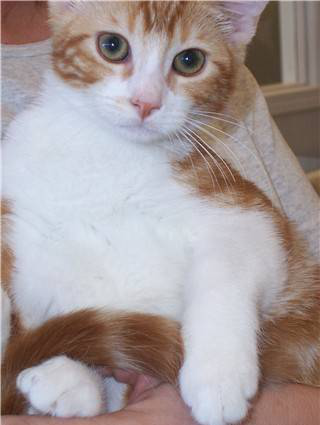

In [46]:
img

In [47]:
if (model.predict(x)<0.5):
    print('cat')
else:
    print('dog')

cat
